# Importing Libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading from dataset

In [ ]:
#reading and storing from csv file
dataset = pd.read_csv("wine.csv")

In [ ]:
#display first 5 values in the table
dataset.head

<bound method NDFrame.head of      Label  Alcohol  Malic_Acid   Ash  ...  Color_Intensity  Hue   OD280  Proline
0        1    14.23        1.71  2.43  ...             5.64  1.04   3.92     1065
1        1    13.20        1.78  2.14  ...             4.38  1.05   3.40     1050
2        1    13.16        2.36  2.67  ...             5.68  1.03   3.17     1185
3        1    14.37        1.95  2.50  ...             7.80  0.86   3.45     1480
4        1    13.24        2.59  2.87  ...             4.32  1.04   2.93      735
..     ...      ...         ...   ...  ...              ...   ...    ...      ...
173      3    13.71        5.65  2.45  ...             7.70  0.64   1.74      740
174      3    13.40        3.91  2.48  ...             7.30  0.70   1.56      750
175      3    13.27        4.28  2.26  ...            10.20  0.59   1.56      835
176      3    13.17        2.59  2.37  ...             9.30  0.60   1.62      840
177      3    14.13        4.10  2.74  ...             9.20  0.61   

In [ ]:
#print the number of rows and columns
dataset.shape

(178, 14)

In [ ]:
#checking how many labels are present in table
dataset['Label'].value_counts()

2    71
1    59
3    48
Name: Label, dtype: int64

# Correlation between attributes

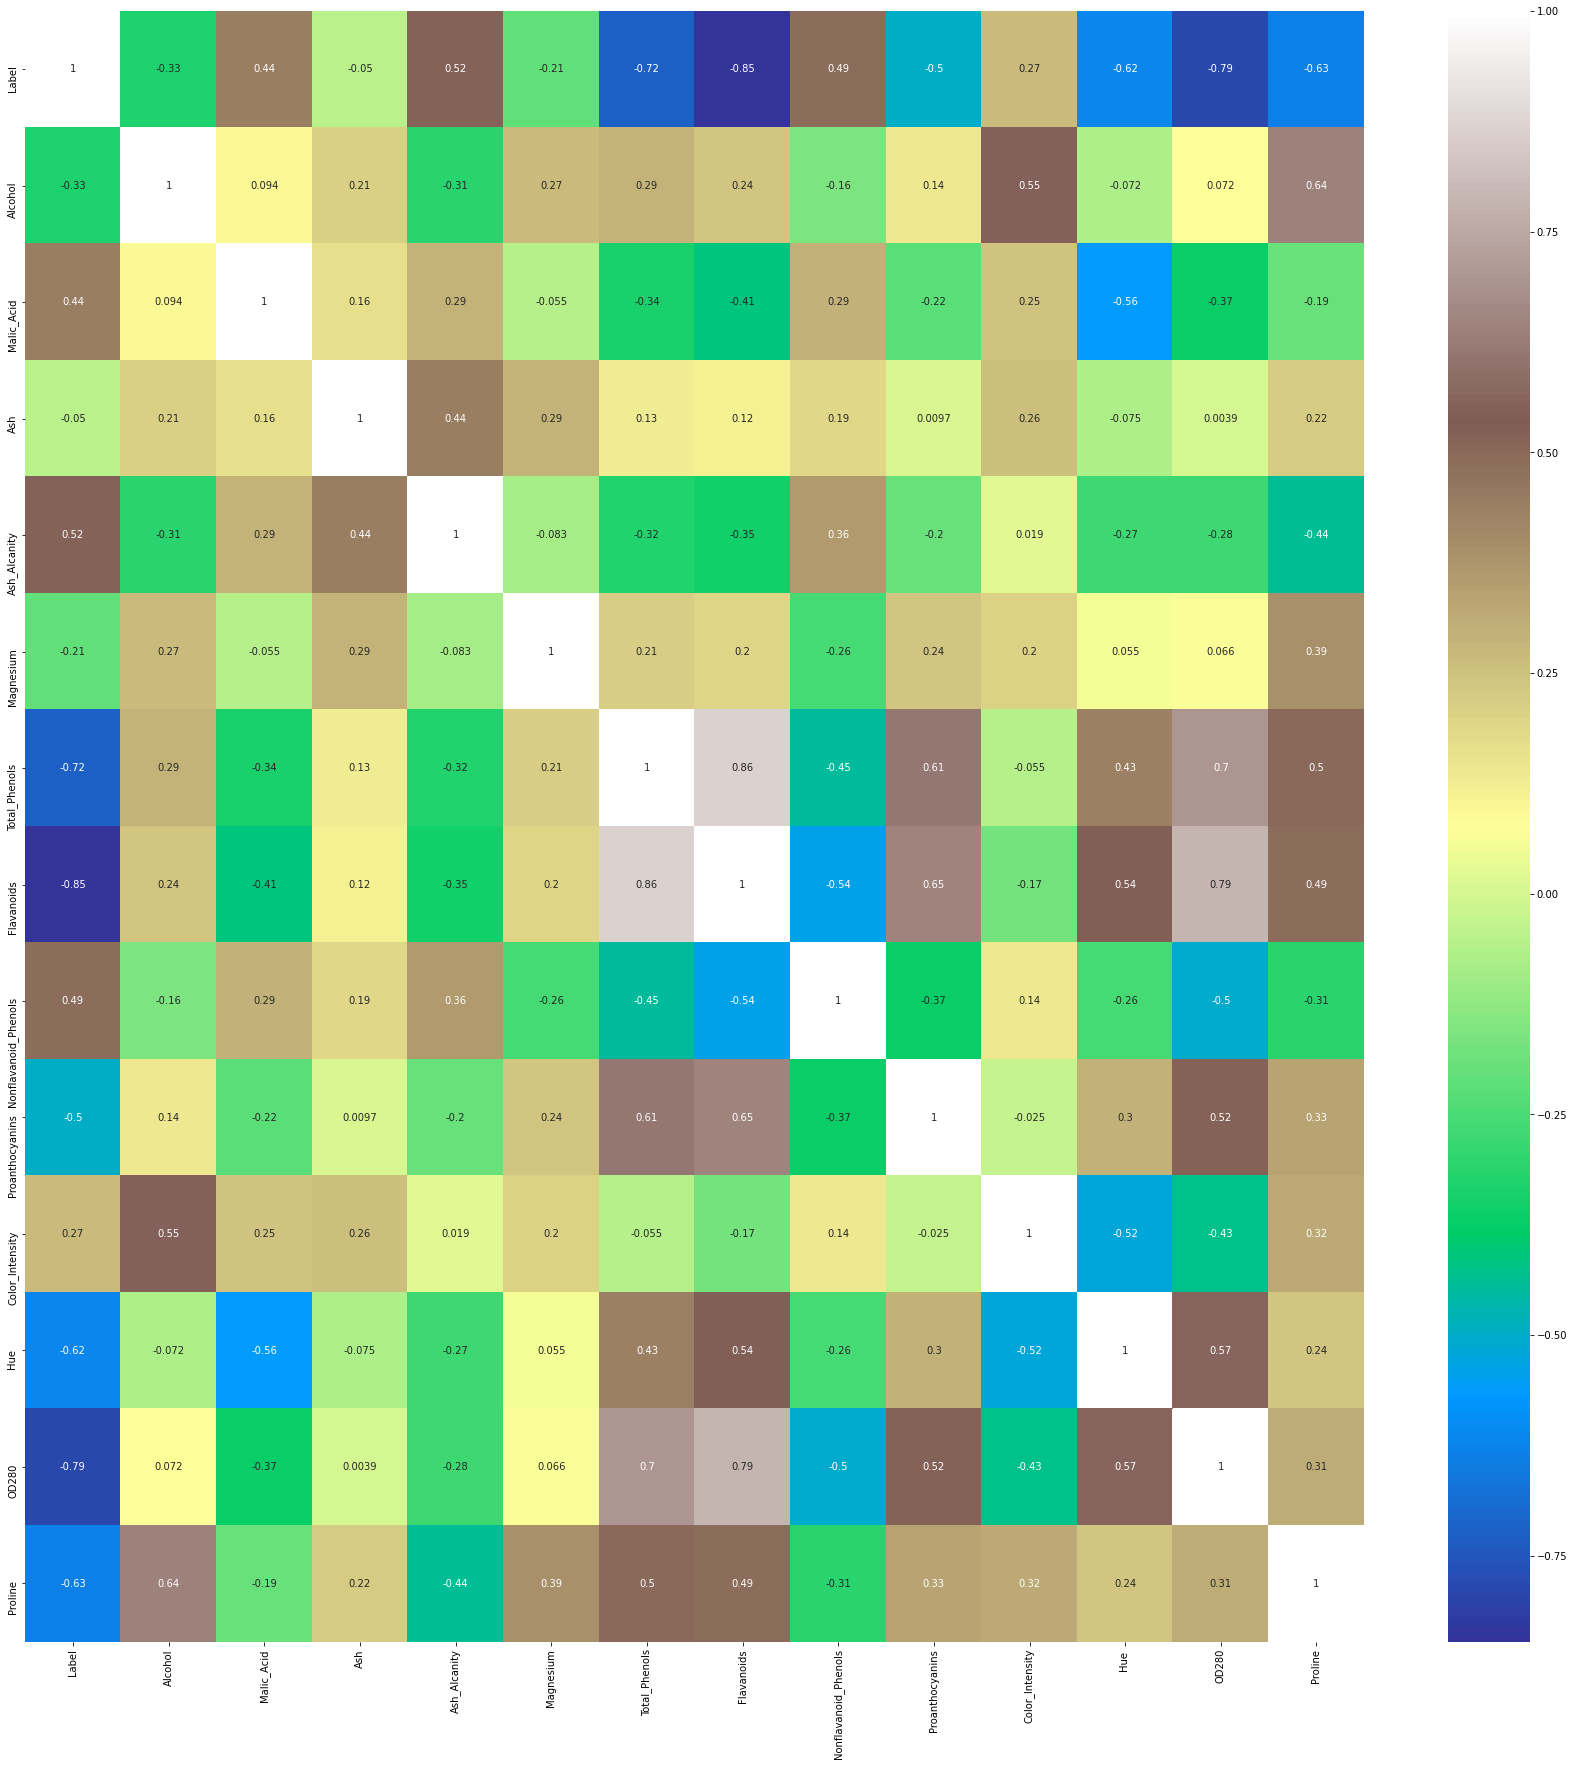

In [ ]:
#get correlations of each features in dataset
corrmat = dataset.corr()
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(dataset.corr(),annot=True,cmap="terrain")

# Preprocessing data

In [ ]:
#separating dependent and independent variables as its unsupervised learning
independent_attr = dataset.iloc[:, 1:].values
independent_attr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# KMeans

In [ ]:
#performing kmeans for 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(independent_attr)
kmeans_clus_cen = kmeans.cluster_centers_
print("Predicted labels after clustering are:\n", kmeans_label)
print("Cluster centers are:\n", kmeans_clus_cen)

Predicted labels after clustering are:
 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
Cluster centers are:
 [[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-

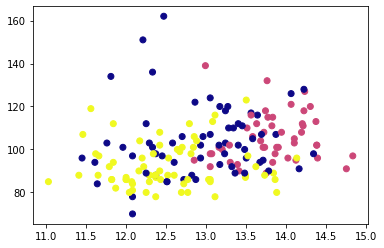

In [ ]:
#plotting the points on graph
plt.scatter(independent_attr[:,0], independent_attr[:,4], c=kmeans_label)
plt.show()

# Elbow method

In [ ]:
#using elbow method to find error for k=1 to k=9
error_arr = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans_label = kmeans.fit_predict(independent_attr)
  error_arr.append(kmeans.inertia_)
error_arr

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1331903.0622637183,
 916379.187153917,
 647326.0020260847,
 412137.50910045847,
 323223.2470542668,
 270954.92924153747]

<function matplotlib.pyplot.show>

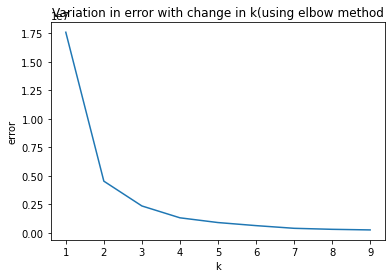

In [ ]:
#ploting variation of error with k
plt.plot(range(1,10),error_arr)
plt.title("Variation in error with change in k(using elbow method")
plt.xlabel("k")
plt.ylabel("error")
plt.show

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans_label = kmeans.fit_predict(independent_attr)
kmeans_clus_cen = kmeans.cluster_centers_
print("Predicted labels after clustering are:\n", kmeans_label)
print("Cluster centers are:\n", kmeans_clus_cen)

Predicted labels after clustering are:
 [2 2 0 0 1 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 1 1 2 2 2 2 0 0 2 2 0 0 2 0 2 2 2
 2 2 1 1 2 2 1 2 2 2 2 2 0 2 0 0 0 2 2 2 0 0 3 1 3 1 3 3 1 3 3 1 1 2 3 3 2
 2 3 3 3 1 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 2 1 3 1 3 1 1 3 3 1 3 3 3 3 1 1
 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 1 2 2 3 1
 1 1 3 3 3 1 1 1 3 2 1 1 3 1 1 1 1 3 1 1 1 1 3 3 1 1 1 2 2 1]
Cluster centers are:
 [[1.38600000e+01 1.79391304e+00 2.50695652e+00 1.70739130e+01
  1.06000000e+02 2.94304348e+00 3.11086957e+00 2.98695652e-01
  1.92608696e+00 6.26000000e+00 1.10000000e+00 3.03565217e+00
  1.33856522e+03]
 [1.28700000e+01 2.69762712e+00 2.37932203e+00 2.02406780e+01
  9.98305085e+01 2.02762712e+00 1.42728814e+00 4.04237288e-01
  1.43491525e+00 5.55152542e+00 8.70508475e-01 2.27016949e+00
  6.59220339e+02]
 [1.34594872e+01 2.12589744e+00 2.39076923e+00 1.81256410e+01
  1.07641026e+02 2.59435897e+00 2.53282051e+00 3.03589744e-01
  1.80820513e+00 5.21923077e+00 1.00041026e+

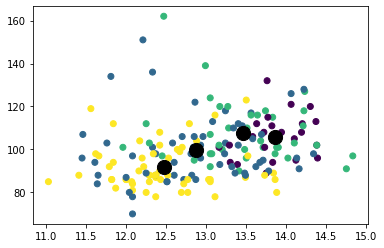

In [ ]:
plt.scatter(independent_attr[:,0], independent_attr[:,4], c=kmeans_label)
plt.scatter(kmeans_clus_cen[:,0], kmeans_clus_cen[:,4],s=200, c='black')
plt.show()

# Normalizing last column and trying

In the dataset we can see that Proline column has very high values compared to other columns so we will normalize the values of the Proline column between 1 to 5 and then perform kmeans clustering

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,5))
x_scaled = min_max_scaler.fit_transform(dataset[['Proline']].values.astype(float))
data_normalized = pd.DataFrame(x_scaled)
dataset['Proline']=x_scaled
dataset.head

<bound method NDFrame.head of      Label  Alcohol  Malic_Acid   Ash  ...  Color_Intensity  Hue   OD280   Proline
0        1    14.23        1.71  2.43  ...             5.64  1.04   3.92  3.245364
1        1    13.20        1.78  2.14  ...             4.38  1.05   3.40  3.202568
2        1    13.16        2.36  2.67  ...             5.68  1.03   3.17  3.587732
3        1    14.37        1.95  2.50  ...             7.80  0.86   3.45  4.429387
4        1    13.24        2.59  2.87  ...             4.32  1.04   2.93  2.303852
..     ...      ...         ...   ...  ...              ...   ...    ...       ...
173      3    13.71        5.65  2.45  ...             7.70  0.64   1.74  2.318117
174      3    13.40        3.91  2.48  ...             7.30  0.70   1.56  2.346648
175      3    13.27        4.28  2.26  ...            10.20  0.59   1.56  2.589158
176      3    13.17        2.59  2.37  ...             9.30  0.60   1.62  2.603424
177      3    14.13        4.10  2.74  ...             9.

In [ ]:
#separating dependent and independent variables as its unsupervised learning
independent_attr = dataset.iloc[:, 1:].values
independent_attr

array([[14.23      ,  1.71      ,  2.43      , ...,  1.04      ,
         3.92      ,  3.24536377],
       [13.2       ,  1.78      ,  2.14      , ...,  1.05      ,
         3.4       ,  3.20256776],
       [13.16      ,  2.36      ,  2.67      , ...,  1.03      ,
         3.17      ,  3.58773181],
       ...,
       [13.27      ,  4.28      ,  2.26      , ...,  0.59      ,
         1.56      ,  2.58915835],
       [13.17      ,  2.59      ,  2.37      , ...,  0.6       ,
         1.62      ,  2.60342368],
       [14.13      ,  4.1       ,  2.74      , ...,  0.61      ,
         1.6       ,  1.80456491]])

In [ ]:
#performing kmeans for 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans_label = kmeans.fit_predict(independent_attr)
kmeans_clus_cen = kmeans.cluster_centers_
print("Predicted labels after clustering are:\n", kmeans_label)
print("Cluster centers are:\n", kmeans_clus_cen)

Predicted labels after clustering are:
 [3 0 0 3 3 3 0 3 0 0 0 0 1 1 0 3 3 3 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 2 3 0 3
 0 0 3 3 1 0 0 0 3 0 0 0 3 1 0 3 3 3 3 3 0 3 1 0 0 0 1 0 0 1 1 3 2 0 1 1 2
 0 0 1 3 2 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 2 2 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 3 0 1 1 1 1 1 1 1 3 0 0 0 1 0 1 0 1 0 0 1 0 1 3 0 1 1
 1 3 3 3 3 0 0 1 1 0 0 1 1 0 0 0 1 1 3 1 0 3 0 1 1 0 0 3 3 0]
Cluster centers are:
 [[ 13.07633803   2.3443662    2.39971831  19.15633803  99.94366197
    2.31492958   2.02197183   0.35788732   1.58070423   5.03309859
    0.96698592   2.63112676   2.52964578]
 [ 12.65859375   2.40015625   2.23765625  20.1578125   86.25
    2.108125     1.76625      0.39875      1.51703125   4.35453123
    0.94765625   2.53546875   1.76658345]
 [ 12.595        1.50333333   2.32333333  20.26666667 142.33333333
    2.35         2.00333333   0.27666667   2.235        3.35
    1.16833333   2.795        2.70328103]
 [ 13.5127027    2.34567568   2.5327027   18.87297297 115.78

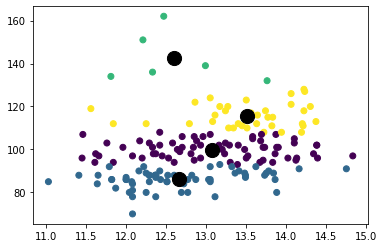

In [ ]:
plt.scatter(independent_attr[:,0], independent_attr[:,4], c=kmeans_label)
plt.scatter(kmeans_clus_cen[:,0], kmeans_clus_cen[:,4],s=200, c='black')
plt.show()

In [ ]:
#using elbow method to find error for k=1 to k=9
error_arr = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans_label = kmeans.fit_predict(independent_attr)
  error_arr.append(kmeans.inertia_)
error_arr

[39930.288873514495,
 17231.160932402257,
 10780.826704787269,
 7597.071167924023,
 6405.3250901469855,
 5570.690497704381,
 5010.714269955679,
 4428.93111946562,
 3958.298714505295]

<function matplotlib.pyplot.show>

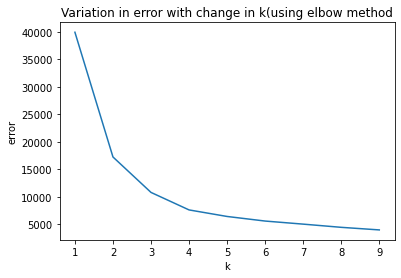

In [ ]:
#ploting variation of error with k
plt.plot(range(1,10),error_arr)
plt.title("Variation in error with change in k(using elbow method")
plt.xlabel("k")
plt.ylabel("error")
plt.show

# viva question

In [ ]:
kmeans= KMeans(n_clusters=3)
kmeans_lab = kmeans.fit_predict(independent_attr)
print(kmeans_lab)

[2 0 0 0 2 0 0 2 0 0 0 0 1 1 0 0 2 2 0 2 2 0 0 0 0 2 1 1 0 0 0 0 0 2 0 0 0
 0 0 2 2 1 0 0 0 0 0 0 0 0 1 1 0 2 2 2 2 0 0 1 0 0 1 1 0 0 1 1 0 2 0 1 1 2
 0 0 1 0 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 2 2 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 2 0 1 1 1 1 1 1 1 2 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1
 1 0 2 0 2 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 2 2 0]


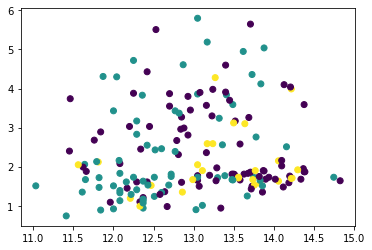

In [ ]:
plt.scatter(independent_attr[:,0], independent_attr[:,1], c=kmeans_lab)
plt.show()